## reading CSV files with Pandas and some simple Dataframe manipulations

In [1]:
%matplotlib inline

### pathlib
import pathlib

### scipy
import numpy as np
import pandas as pd

### plotting
from matplotlib import pyplot as plt
import matplotlib

In [2]:
import pathlib

In [3]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2

#### Daily temperature data for 30 NZ stations from https://data.mfe.govt.nz/table/105056-daily-temperature-1909-2019/ 

In [4]:
dpath = pathlib.Path('/media/nicolasf/END19101/data/NZ_station_data/temperature/')

#### read the data in csv, setting up the index (labels along the rows) to be the first column (indexing starts at 0 in Python)

In [5]:
data = pd.read_csv(dpath.joinpath('daily-temperature-1909-2019.csv'), index_col=0)

In [6]:
data.head()

,date,statistic,temperature,station_name_niwa,agent_number
location_name,,,,,
Auckland,1966-01-01,Maximum,22.2,Auckland Aero,1962
Auckland,1966-01-01,Minimum,13.9,Auckland Aero,1962
Auckland,1966-01-01,Average,18.1,Auckland Aero,1962
Auckland,1966-01-02,Maximum,23.9,Auckland Aero,1962
Auckland,1966-01-02,Minimum,17.1,Auckland Aero,1962


In [7]:
location_names = data.index.unique()

In [8]:
location_names

Index(['Auckland', 'Blenheim', 'Christchurch', 'Dannevirke', 'Dunedin',
       'Gisborne', 'Gore', 'Hamilton', 'Hokitika', 'Invercargill', 'Kerikeri',
       'Lake Tekapo', 'Masterton', 'Milford Sound', 'Napier', 'Nelson',
       'New Plymouth', 'Queenstown', 'Reefton', 'Rotorua', 'Tara Hills',
       'Taumarunui', 'Taupo', 'Tauranga', 'Timaru', 'Waiouru', 'Wellington',
       'Whanganui', 'Whangaparaoa', 'Whangarei'],
      dtype='object', name='location_name')

In [9]:
len(location_names)

30

### select a location (index) and a statistic in the `statistic` column 

In [10]:
location = 'Hamilton'

In [11]:
statistic = 'Maximum'

In [12]:
df = data.loc[location,:].query(f"statistic == '{statistic}'")

In [13]:
df.head()

,date,statistic,temperature,station_name_niwa,agent_number
location_name,,,,,
Hamilton,1972-01-01,Maximum,25.6,Hamilton Aws,2112
Hamilton,1972-01-02,Maximum,25.4,Hamilton Aws,2112
Hamilton,1972-01-03,Maximum,25.4,Hamilton Aws,2112
Hamilton,1972-01-04,Maximum,24.7,Hamilton Aws,2112
Hamilton,1972-01-05,Maximum,22.3,Hamilton Aws,2112


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17532 entries, Hamilton to Hamilton
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               17532 non-null  object 
 1   statistic          17532 non-null  object 
 2   temperature        17532 non-null  float64
 3   station_name_niwa  17532 non-null  object 
 4   agent_number       17532 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 821.8+ KB


In [15]:
df = df.set_index('date')

In [16]:
df.head()

,statistic,temperature,station_name_niwa,agent_number
date,,,,
1972-01-01,Maximum,25.6,Hamilton Aws,2112
1972-01-02,Maximum,25.4,Hamilton Aws,2112
1972-01-03,Maximum,25.4,Hamilton Aws,2112
1972-01-04,Maximum,24.7,Hamilton Aws,2112
1972-01-05,Maximum,22.3,Hamilton Aws,2112


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17532 entries, 1972-01-01 to 2019-12-31
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   statistic          17532 non-null  object 
 1   temperature        17532 non-null  float64
 2   station_name_niwa  17532 non-null  object 
 3   agent_number       17532 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 684.8+ KB


In [18]:
df.index

Index(['1972-01-01', '1972-01-02', '1972-01-03', '1972-01-04', '1972-01-05',
       '1972-01-06', '1972-01-07', '1972-01-08', '1972-01-09', '1972-01-10',
       ...
       '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
      dtype='object', name='date', length=17532)

In [19]:
df.index = pd.to_datetime(df.index)

In [20]:
df.index

DatetimeIndex(['1972-01-01', '1972-01-02', '1972-01-03', '1972-01-04',
               '1972-01-05', '1972-01-06', '1972-01-07', '1972-01-08',
               '1972-01-09', '1972-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=17532, freq=None)

In [21]:
df = df[['temperature']]

In [22]:
df.head()

,temperature
date,
1972-01-01,25.6
1972-01-02,25.4
1972-01-03,25.4
1972-01-04,24.7
1972-01-05,22.3


<AxesSubplot:xlabel='date'>

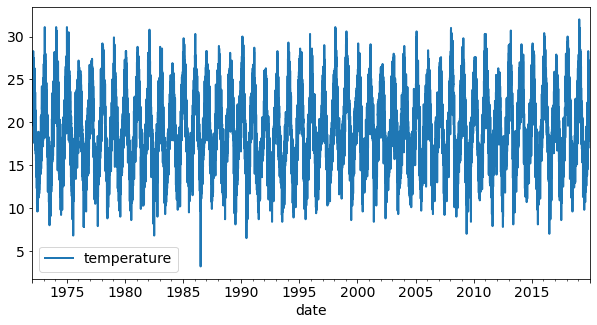

In [23]:
df.plot()

### resampling, take the maximum daily temperature for each calendar month

In [24]:
df_monthly = df.resample('1M').max()

<AxesSubplot:xlabel='date'>

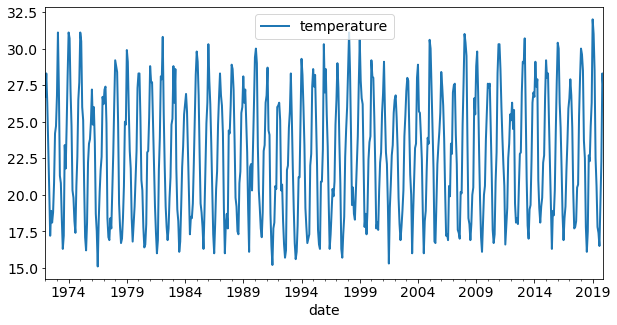

In [25]:
df_monthly.plot()

In [26]:
df_monthly.describe()

,temperature
count,576.000000
mean,22.712153
std,4.231936
min,15.100000
25%,18.875000
50%,22.650000
75%,26.300000
max,32.000000


In [27]:
df.describe()

,temperature
count,17532.000000
mean,18.973386
std,4.373612
min,3.200000
25%,15.500000
50%,18.600000
75%,22.400000
max,32.000000


### calculate the climatological 90th percentile (value exceeded only 10% of the time)

In [28]:
clim = df_monthly.loc['1990':'2020',:]

In [29]:
clim_q90 = clim.groupby(clim.index.month).quantile(0.90)

In [30]:
clim_q90

,temperature
date,
1,30.60
2,30.04
3,28.55
4,25.81
5,22.11
6,19.37
7,18.13
8,19.01
9,20.91


<AxesSubplot:xlabel='date'>

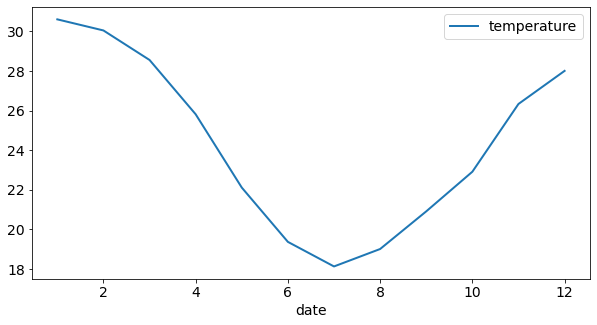

In [31]:
clim_q90.plot()

### repeat these values along the whole time-series 

In [32]:
clim_q90 = clim_q90.loc[df_monthly.index.month,:]

In [33]:
clim_q90.head()

,temperature
date,
1,30.60
2,30.04
3,28.55
4,25.81
5,22.11


In [34]:
len(clim_q90)

576

In [35]:
len(df_monthly)

576

In [36]:
df_monthly.loc[:,'q90'] = clim_q90.values

In [37]:
df_monthly.head()

,temperature,q90
date,,
1972-01-31,26.7,30.60
1972-02-29,28.3,30.04
1972-03-31,26.3,28.55
1972-04-30,23.5,25.81
1972-05-31,20.4,22.11


### we can now do some comparisons 

In [38]:
df_monthly.loc[:,'temperature'] >= df_monthly.loc[:,'q90']

date
1972-01-31    False
1972-02-29    False
1972-03-31    False
1972-04-30    False
1972-05-31    False
              ...  
2019-08-31    False
2019-09-30    False
2019-10-31    False
2019-11-30     True
2019-12-31    False
Freq: M, Length: 576, dtype: bool

In [39]:
hot_months = df_monthly.loc[df_monthly.temperature >= df_monthly.q90,'temperature']

In [40]:
hot_months.head()

date
1972-07-31    18.9
1973-02-28    31.1
1973-09-30    23.4
1973-12-31    28.2
1974-01-31    31.1
Name: temperature, dtype: float64

In [41]:
len(hot_months)

60

### use the `reindex` method to create a continuous time-series (NaNs (Not a Number, i.e. missing values) will be inserted)

In [42]:
hot_months = hot_months.reindex(df_monthly.index)

<AxesSubplot:xlabel='date'>

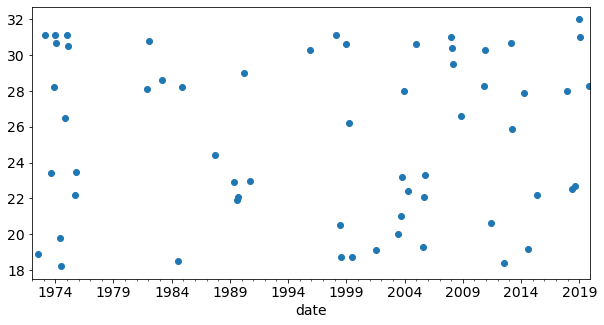

In [43]:
hot_months.plot(marker='o', linewidth=0)